<a href="https://colab.research.google.com/github/Tauseef-09/The_Sparks_Foundation_Internship_Tasks/blob/main/Task_1_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation

## GRIP(Graduate Rotational Internship Program) January 2023.

# Name :-  Tauseef Taufiq

##Domain:- Data Science & Business Analytics

## **Task 1 : Prediction using Supervised ML**


From the given dataset we have to predict the percentage score of the student based on number of hours studied. Here the only feature is the number of hours studied and the target variable is percentage scored.

* Dataset: : http://bit.ly/w-data

---
# Table of Content


* __Step 1: Importing the Necessary Libraries__
    
* __Step 2: Data Loading__
    
* __Step 3: Basic observation of our Dataset__
    
* __Step 4: Exploring Features of our Dataset__
   
* __Step 5: Model Implementation__

* __Step 6: Conclusion__

---

---
## Importing the Necessary Libraries
---

In [1]:
# importing the necessary libraries for Data Manuplation and Data Visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing the necessary libraries for model implementation.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing the warnings library to overcome the unnecessary warnings.

import warnings
warnings.filterwarnings("ignore")

---
## Data Loading
---

In [2]:
# Reading the Data 
my_data = pd.read_csv('http://bit.ly/w-data')

---
## Basic observation of our Dataset
---

In [3]:
# Trying to know about the shape of our data set.

print(f'The number of observations in our Data set =', my_data.shape[0])
print(f'The number of features in our Data set =', my_data.shape[1])


The number of observations in our Data set = 25
The number of features in our Data set = 2


In [4]:
# Getting a glance of what kinda data present in our data set.

my_data.sample(5) 


,Hours,Scores
8,8.3,81
19,7.4,69
12,4.5,41
10,7.7,85
15,8.9,95


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking for duplicate observations.

my_data.duplicated().sum()


0

In [7]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## INFERENCE

* 25 observations and 2 features.
* Null values are not present in our features.
* There are no duplicate observations in our Dataset.

---
## Exploring Features of our Dataset
---

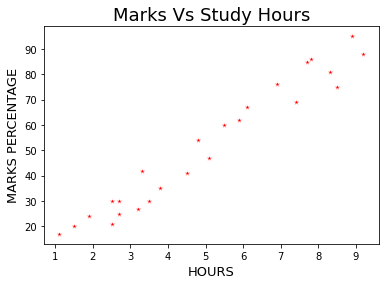

In [8]:
# Plotting the scatter plot.

sns.scatterplot(data = my_data, x = "Hours", y="Scores", color = 'red', marker = '*')
plt.title('Marks Vs Study Hours',size = 18)
plt.ylabel('MARKS PERCENTAGE', size = 13)
plt.xlabel('HOURS', size = 13)
plt.show()


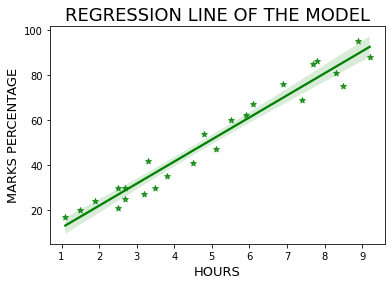

In [9]:
# Plotting the regression plot.

sns.regplot(x= my_data['Hours'], y= my_data['Scores'], color = 'g', marker = '*')
plt.title('REGRESSION LINE OF THE MODEL', size = 18)
plt.ylabel('MARKS PERCENTAGE', size = 13)
plt.xlabel('HOURS', size = 13)
plt.show()


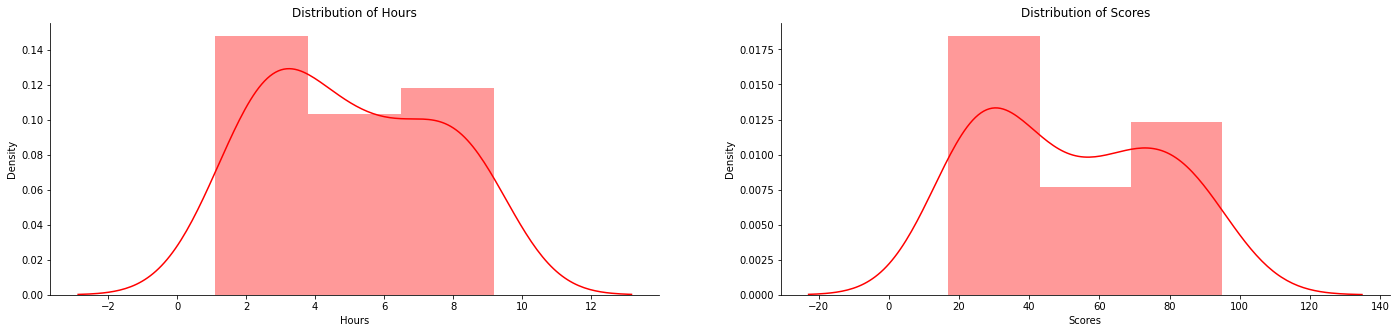

In [10]:
# Checking the distribution of our features.

col = ['Hours', 'Scores']
plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots
fig, axes = plt.pyplot.subplots(nrows=1, ncols=2, figsize=(24, 5))
ax = axes.flatten()
i = 0
for co in col:

  sns.distplot(my_data[co], color = 'r', ax = ax[i])
  ax[i].set_title(f'Distribution of {co}')
  i += 1

sns.despine(fig)


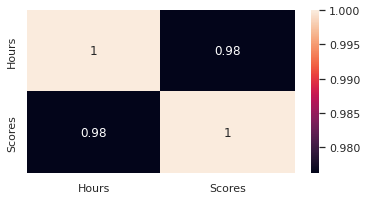

In [11]:
# Trying the find the correlation of input variable and Target variable

corr = my_data.corr()
sns.set(rc = {'figure.figsize':(6, 3)})
sns.heatmap(corr, annot = True)


## INFERENCE

* We can clearly see a linear trend between Input variable and Target variable in scatter plot.

* The distribution plot shows similar trend in both variables

* The correlation between Hours and Scores variables is 0.98 which is very high and very suitable to implement Linear Regression Model.



---
## Model Implementation
---

In [12]:
X_train, X_test, y_train, y_test = train_test_split(my_data.iloc[:, :-1].values, my_data.iloc[:, 1].values, test_size = 0.3, random_state = 42)

In [13]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 5.1708315630914194
Test Data MAE : 4.499999999999998
Train Data MSE : 31.398307995353253
Test Data MSE : 23.61945761415174
Train Data RMSE: 5.603419312826166
Test Data RMSE: 4.859985351228103
Train R2 : 0.9536486503889446
Test R2 : 0.9487647340257012
Adjusted R2 :  0.9402255230299846


---
## Conclusion
---

In [14]:
from prettytable import PrettyTable

print('**** SIMPLE LINEAR REGRESSION MODEL ****')
table = PrettyTable(['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Adjusted R2 Score'])
table.add_row(['Linear regression Train Data', LR_Train_MAE, LR_Train_MSE, LR_Train_RMSE, LR_Train_R2, '---'])
table.add_row(['Linear regression Test Data', LR_Test_MAE, LR_Test_MSE, LR_Test_RMSE, LR_Test_R2, LR_Adjusted_R2])
print(table)


**** SIMPLE LINEAR REGRESSION MODEL ****
+------------------------------+--------------------+--------------------+-------------------+--------------------+--------------------+
|            Model             |        MAE         |        MSE         |        RMSE       |      R2 Score      | Adjusted R2 Score  |
+------------------------------+--------------------+--------------------+-------------------+--------------------+--------------------+
| Linear regression Train Data | 5.1708315630914194 | 31.398307995353253 | 5.603419312826166 | 0.9536486503889446 |        ---         |
| Linear regression Test Data  | 4.499999999999998  | 23.61945761415174  | 4.859985351228103 | 0.9487647340257012 | 0.9402255230299846 |
+------------------------------+--------------------+--------------------+-------------------+--------------------+--------------------+


In [15]:
# Predicting the value of percentage for 9.25 hours of study.

hours = np.array([9.25])
hours = hours.reshape(1, -1)
answer = reg.predict(hours)
print("Marks Percentage = {}".format(round(answer[0],2)))


Marks Percentage = 92.62


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.62 marks.

---
---